### import necessary libraies

In [57]:
import pandas as pd
import os

### Merge the 12 months of sales data in a single csv file

In [58]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/" + file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv("all_data.csv", index=False)

### Read in updated dataframe

In [59]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean up the data

In [60]:
all_data.isnull().sum() # showing the number of null values in each columns


Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [61]:
nan_df = all_data[all_data.isna().any(axis=1)] # showing the columns with nan values
nan_df.head(10)

all_data = all_data.dropna(how='all') # droping all the rows with nan values
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or'] # there are a lots of rows that contains no sales data but only the name of the column.
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) # make int. this way I dont need to specify what kind of numeric value I need. it does it automaticaly
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) # make float
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## Augmenting data with additional columns

#### Adding month column

In [62]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()                             

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Adding a sales Column

In [63]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Adding a city column

In [64]:
# in here we are gonna use .apply() method. It allows us to run a function on a dataset
# in here we are taking the Purchase Address column and splitting it via ",". since the name of the city is the second part of the address, [1] it grabs the city and add it to the city column. lamda x is here to grab a cell content
def get_city(address):
    return address.split(',')[1]
# since there might be a few duplicate regarding the name of the city so the name of the state will be taken to avoid confusions. for this we will be doing a double split 
def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x)) 
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


#### What was the best month for sale? How much was earned?

In [65]:
results = all_data.groupby('Month').sum(numeric_only=True)

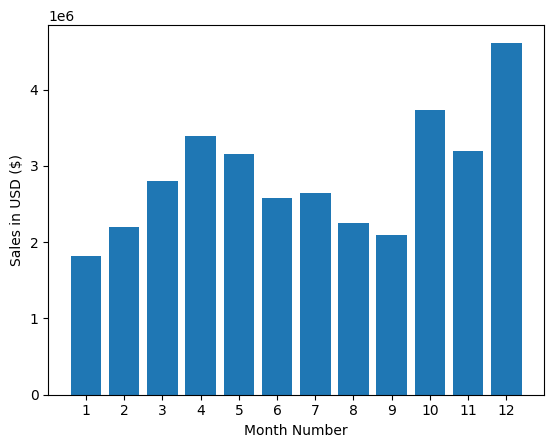

In [66]:
import matplotlib.pyplot as plt

months = range(1,13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month Number')
plt.show()

### What city had the highest number of sales?

In [67]:
results = all_data.groupby('City').sum(numeric_only=True)
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,16602,2779908.20,104794,2795498.58
Austin TX,11153,1809873.61,69829,1819581.75
Boston MA,22528,3637409.77,141112,3661642.01
Dallas TX,16730,2752627.82,104620,2767975.40
Los Angeles CA,33289,5421435.23,208325,5452570.80
New York City NY,27932,4635370.83,175741,4664317.43
Portland ME,2750,447189.25,17144,449758.27
Portland OR,11303,1860558.22,70621,1870732.34
San Francisco CA,50239,8211461.74,315520,8262203.91


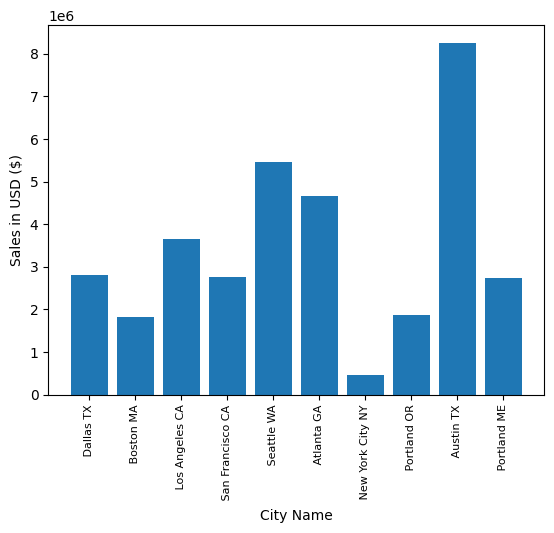

In [68]:
cities = all_data['City'].unique()
# this code has a problem. if we look at the sales in the group by data we can see that San Francisco has the highest sale but in here the chart is showing something different
plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation = 'vertical', size = 8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.show()

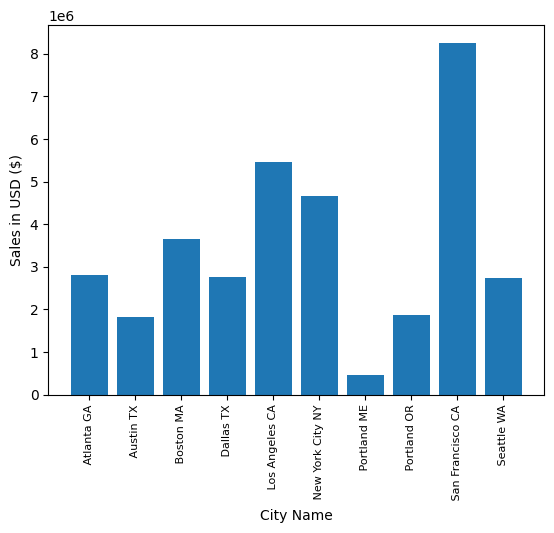

In [69]:
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation = 'vertical', size = 8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.show()

The difference between the two sets of code lies in the way the `cities` variable is generated. Let's break down each code block:

1. Code Block 1:
```python
cities = all_data['City'].unique()
```
In this code block, the `cities` variable is created by extracting unique city names from the 'City' column of the `all_data` DataFrame using the `unique()` function. This means that each city will appear only once in the `cities` array, even if it occurs multiple times in the original DataFrame.

2. Code Block 2:
```python
cities = [city for city, df in all_data.groupby('City')]
```
In this code block, the `cities` variable is generated by iterating over the grouped DataFrame `all_data.groupby('City')`. The `groupby()` function groups the data by the 'City' column, and then the `for` loop iterates over the groups, extracting the city names (group keys) and adding them to the `cities` list. As a result, each city name will appear as many times as it occurs in the original DataFrame.

The difference in the `cities` variable impacts the behavior of the subsequent `plt.bar()` function calls because the number of occurrences of each city name affects how the data is plotted.

The following code can be another way to go

C:\Users\Wahidur Rahman Upal\AppData\Local\Temp\ipykernel_21532\4100312163.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results1 = all_data.groupby('City').sum()


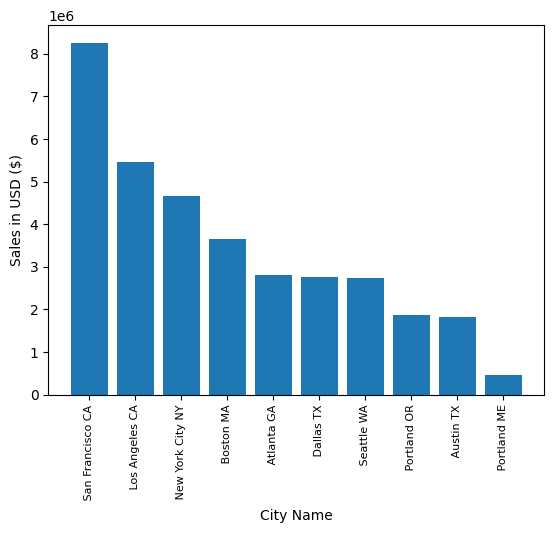

In [72]:
cities = all_data['City'].unique()

# Perform the groupby operation to get the results
results1 = all_data.groupby('City').sum()

# Sort the results DataFrame in descending order based on 'Sales'
results1 = results1.sort_values(by='Sales', ascending=False)

# Plot the bar chart with cities and their corresponding sales
plt.bar(results1.index, results1['Sales'])  # Use the index of the results DataFrame as x-axis values
plt.xticks(rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.show()


### What time should the advertisement be displayed to maximize the likelihood of customer's buying a product?

In [76]:
# first we need to change the format of the order date column into a datetime format
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


In [78]:
hours = [hour for hour, df in all_data.groupby('Hour')] # like previously mentioned we used groupby aggregate the for hourly purchase
all_data.groupby(['Hour']).count()# we used .count because we need to figure out how many sales were made on the every hour

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minute
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


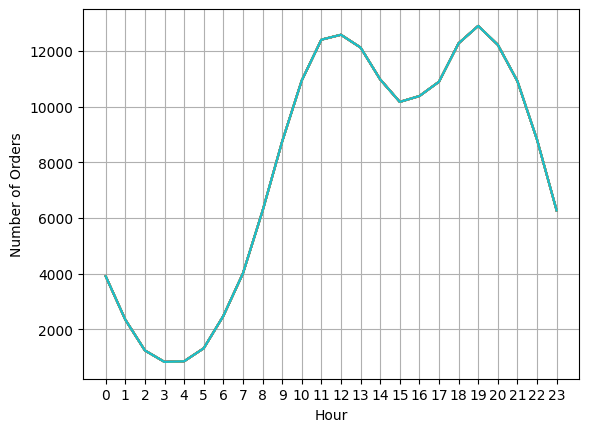

In [82]:
plt.plot(hours, all_data.groupby(['Hour']).count()) 
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

# The chart shows that the number of orders is at it's peak around 11 am and 7 pm. So the advertisement should be around the same time

### What products are most often sold together?

The idea here is to figure out which products were ordered from the same person around the same time. For example the order ID no- 176560 bought a google phone and a Wired Headphones
around the same time. So it can be said that Google Phone and Wired Headphones are sold together

In [88]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
#  the code filters the all_data DataFrame to create a new DataFrame df that contains only the rows where the 'Order ID' column has duplicate values.
#  By using keep=False, all occurrences of duplicates are included in the result.
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
# For each group, it selects the 'Product' column and applies the transform method with a lambda function.
#The lambda function lambda x: ','.join(x) joins the 'Product' values within each group using a comma (',').
#The result of the transform operation is an array containing the joined 'Product' values for each row.
df = df[['Order ID', 'Grouped']].drop_duplicates()
# The [['Order ID', 'Grouped']] part is used to select only the specified columns from the DataFrame.
# The drop_duplicates() function is then applied to remove any duplicate rows from the DataFrame, keeping only the first occurrence of each unique 'Order ID'.
df.head()

# the code performs a groupby operation on the DataFrame based on the 'Order ID' column, and for each group, it creates a new 'Grouped' column 
# containing the comma-separated list of 'Product' values for that group. The duplicate rows are then removed from the DataFrame, leaving only 
# one row per unique 'Order ID' along with the associated 'Grouped' column containing the combined 'Product' values. This can be useful for 
# aggregating and summarizing data based on unique identifiers 

C:\Users\Wahidur Rahman Upal\AppData\Local\Temp\ipykernel_21532\3056193780.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [89]:
# This code snippet utilizes the `itertools.combinations` function and `collections.Counter` to find the most common pairs of products that are frequently purchased together 
# in the DataFrame `df`

# `count = Counter()`: Initialize an empty `Counter` object named `count` to keep track of the combinations and their frequencies.

# Loop through each row in the 'Grouped' column of the DataFrame `df`:
#    - `for row in df['Grouped']:`

# Split the comma-separated values in each row into a list of products:
#    - `row_list = row.split(',')`

# Count the combinations of products in each row using `itertools.combinations` and update the `count` Counter with the occurrences of each combination:
#    - `count.update(Counter(combinations(row_list, 2)))`
#      - `combinations(row_list, 2)`: Generates all combinations of 2 products from the `row_list`.
#      - `Counter(...)`: Converts the combinations to a `Counter` object, where the keys are the combinations, and the values represent their frequencies.
#      - `count.update(...)`: Updates the `count` Counter with the occurrences of combinations from the current row.

from itertools import combinations
from collections import Counter

count = Counter()

for row in df ['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [93]:
# for 3 items that were purchased together the same code can be used with just one change

from itertools import combinations
from collections import Counter

count = Counter()

for row in df ['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,3))) # I just changed the number here from 2 to 3

for key, value in count.most_common(10):
    print(key, value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


### What product was sold the most and why?

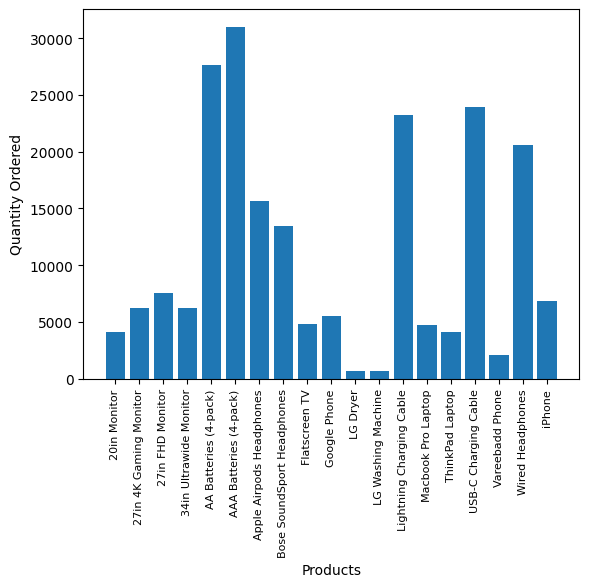

In [102]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum(numeric_only=True)['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.xticks(products, rotation = 'vertical', size = 8)
plt.show()

The obvious answer could be the reason for AAA and AA batteries is sold so much could be the prices of the items and vice versa. One way we can show the correlation is to add a secondary 
chart that shows the price.

In [103]:
prices = all_data.groupby('Product').mean()['Price Each']
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


C:\Users\Wahidur Rahman Upal\AppData\Local\Temp\ipykernel_21532\2294271103.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_data.groupby('Product').mean()['Price Each']


C:\Users\Wahidur Rahman Upal\AppData\Local\Temp\ipykernel_21532\106730368.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_data.groupby('Product').mean()['Price Each']
C:\Users\Wahidur Rahman Upal\AppData\Local\Temp\ipykernel_21532\106730368.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 'vertical', size= 8)


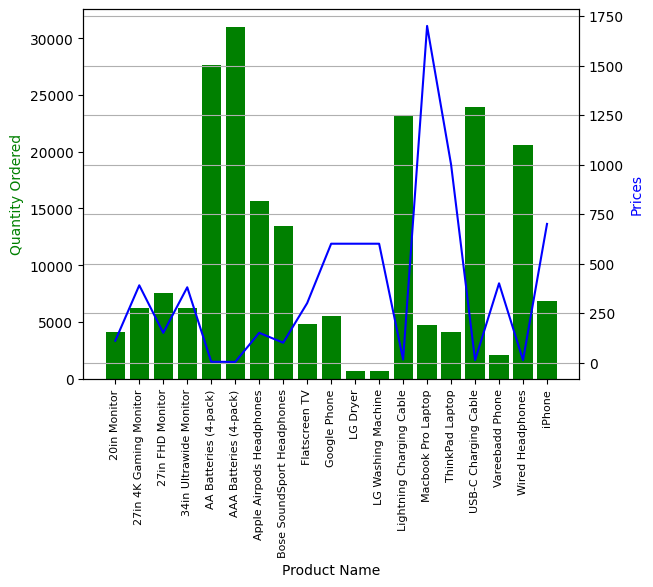

In [105]:
prices = all_data.groupby('Product').mean()['Price Each']
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color = 'g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color = 'g')
ax2.set_ylabel('Prices', color = 'b')
ax1.set_xticklabels(products, rotation = 'vertical', size= 8)
plt.grid()
plt.show()